In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Book1.csv")
df

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,9/3/2020,6:00 PM,Maharashtra,2,0,0,0,2
1,10/3/2020,6:00 PM,Maharashtra,5,0,0,0,5
2,11/3/2020,6:00 PM,Maharashtra,2,0,0,0,2
3,12/3/2020,6:00 PM,Maharashtra,11,0,0,0,11
4,13/03/20,6:00 PM,Maharashtra,14,0,0,0,14
...,...,...,...,...,...,...,...,...
271,6/12/2020,8:00 AM,Maharashtra,-,-,1715884,47694,1847509
272,7/12/2020,8:00 AM,Maharashtra,-,-,1723370,47734,1852266
273,8/12/2020,8:00 AM,Maharashtra,-,-,1730715,47774,1855341
274,9/12/2020,8:00 AM,Maharashtra,-,-,1737080,47827,1859367


In [ ]:
df_new=df[["Confirmed","Date"]]

In [ ]:
df_new.rename(columns = {'Confirmed' : 'y','Date':'ds'},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_new

,y,ds
0,2,9/3/2020
1,5,10/3/2020
2,2,11/3/2020
3,11,12/3/2020
4,14,13/03/20
...,...,...
271,1847509,6/12/2020
272,1852266,7/12/2020
273,1855341,8/12/2020
274,1859367,9/12/2020


In [ ]:
df_new.isnull()

,y,ds
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
271,False,False
272,False,False
273,False,False
274,False,False


In [ ]:
df_new['ds'] = pd.to_datetime(df_new['ds'])

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       276 non-null    int64         
 1   ds      276 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
 df_new.dtypes

y              int64
ds    datetime64[ns]
dtype: object

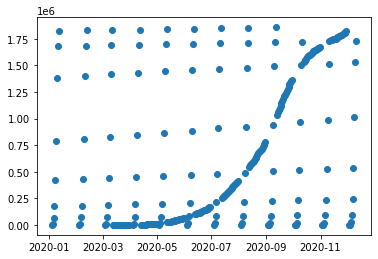

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_new['ds'],df_new['y'])
plt.show()

In [ ]:
df_new.isnull().sum()

y     0
ds    0
dtype: int64

In [ ]:
import fbprophet

op = fbprophet.Prophet(changepoint_prior_scale=1)
op.fit(df_new)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = op.make_future_dataframe(periods = 365 ,freq = 'D')
forecast = op.predict(forecast)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-04,6.759009e+05,-9.383492e+04,1.393871e+06
1,2020-01-05,7.120675e+05,2.912833e+04,1.431670e+06
2,2020-01-06,6.512754e+05,-9.988771e+04,1.309536e+06
3,2020-01-07,6.681933e+05,-2.504205e+04,1.381100e+06
4,2020-01-08,7.034291e+05,9.849569e+03,1.443315e+06
...,...,...,...,...
636,2021-12-07,2.752904e+06,1.239362e+06,4.263756e+06
637,2021-12-08,2.796784e+06,1.313264e+06,4.340595e+06
638,2021-12-09,2.733636e+06,1.243261e+06,4.315236e+06
639,2021-12-10,2.797890e+06,1.262482e+06,4.381249e+06


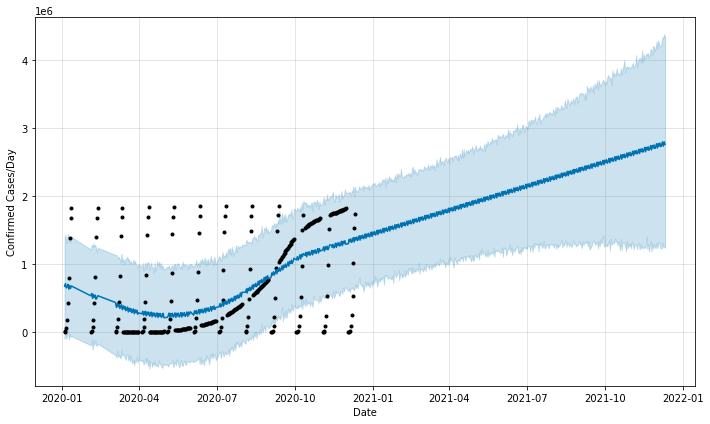

In [ ]:
op.plot(forecast,xlabel = 'Date',ylabel='Confirmed Cases/Day');